<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Temp\ipykernel_9172\812625373.py:8: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv("D:\Major Project\Sales Data.csv")


First few rows of the data:
   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York C

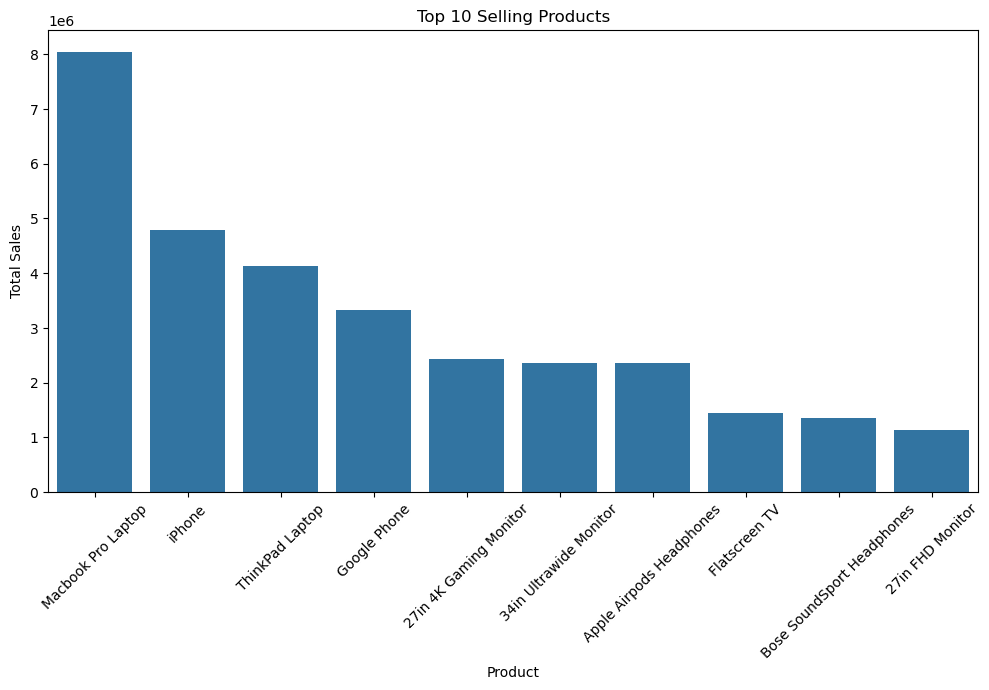

In [6]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
file_path = '/mnt/data/Sales Data.csv'
data = pd.read_csv("D:\Major Project\Sales Data.csv")

# Display the first few rows of the data
print("First few rows of the data:")
print(data.head())

# Display summary information
print("\nData Information:")
print(data.info())

# Display basic statistics of numerical columns
print("\nStatistical summary:")
print(data.describe())

# Cleaning the data
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values (or we can handle them differently if required)
data = data.dropna()

# Remove duplicates if any
data = data.drop_duplicates()

# Parsing dates if there's a date column, assuming 'Date' is the date column name
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Sales analysis by category
if 'Category' in data.columns and 'Sales' in data.columns:
    category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    print("\nTotal sales by category:")
    print(category_sales)
    
    # Plotting sales by category
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_sales.index, y=category_sales.values)
    plt.title("Total Sales by Category")
    plt.xlabel("Category")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

# Time-series analysis (monthly/quarterly trends)
if 'Date' in data.columns and 'Sales' in data.columns:
    data['Month'] = data['Date'].dt.to_period('M')
    monthly_sales = data.groupby('Month')['Sales'].sum()
    
    print("\nMonthly sales:")
    print(monthly_sales)

    # Plotting monthly sales trend
    plt.figure(figsize=(12, 6))
    monthly_sales.plot()
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.show()

# Sales growth analysis (Year-over-Year, Month-over-Month)
if 'Date' in data.columns and 'Sales' in data.columns:
    data['Year'] = data['Date'].dt.year
    yearly_sales = data.groupby('Year')['Sales'].sum()
    sales_growth = yearly_sales.pct_change().dropna() * 100  # percentage growth

    print("\nYear-over-Year Sales Growth (%):")
    print(sales_growth)

    # Plotting Year-over-Year sales growth
    plt.figure(figsize=(10, 6))
    sales_growth.plot(kind='bar', color='skyblue')
    plt.title("Year-over-Year Sales Growth (%)")
    plt.xlabel("Year")
    plt.ylabel("Growth (%)")
    plt.show()

# Top-selling products
if 'Product' in data.columns and 'Sales' in data.columns:
    product_sales = data.groupby('Product')['Sales'].sum().sort_values(ascending=False)
    
    print("\nTop-selling products:")
    print(product_sales.head(10))  # Display top 10 products

    # Plotting top-selling products
    plt.figure(figsize=(12, 6))
    sns.barplot(x=product_sales.head(10).index, y=product_sales.head(10).values)
    plt.title("Top 10 Selling Products")
    plt.xlabel("Product")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()